# Muhammad Abdullah
## ma07534

# Data Science HW 6

In [2]:
import pandas as pd
import numpy as np
import scipy
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('HousePricingData.csv')

In [4]:
df.head()

,Id,LotArea,OverallQual,OverallCond,YearBuilt,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,PavedDrive,SaleCondition,SalePrice
0,1,8450,7,5,2003,856,856,854,1710,1,0,2,1,3,1,0,2,Y,Normal,208500
1,2,9600,6,8,1976,1262,1262,0,1262,0,1,2,0,3,1,1,2,Y,Normal,181500
2,3,11250,7,5,2001,920,920,866,1786,1,0,2,1,3,1,1,2,Y,Normal,223500
3,4,9550,7,5,1915,756,961,756,1717,1,0,1,0,3,1,1,3,Y,Abnorml,140000
4,5,14260,8,5,2000,1145,1145,1053,2198,1,0,2,1,4,1,1,3,Y,Normal,250000


# Tasks

1. Create a regression model between GrLivArea and SalePrice (response
variable). Show the scatter plot with regression line between them. Discuss the R-
squared value.

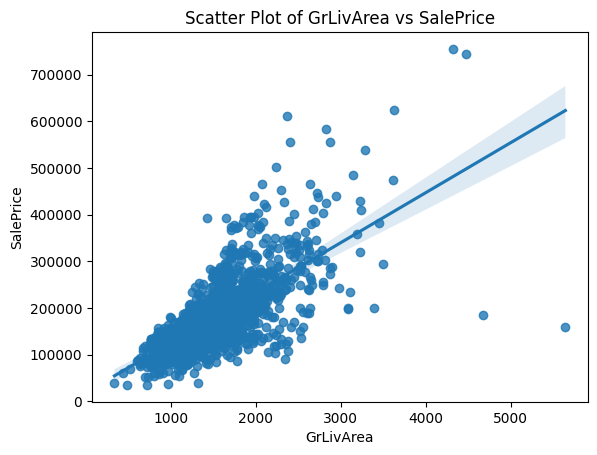

R-squared: 0.5021486502718042


In [61]:
sns.regplot(x='GrLivArea', y='SalePrice', data=df)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title('Scatter Plot of GrLivArea vs SalePrice')
plt.show()
model = ols('SalePrice ~ GrLivArea', data=df).fit()
print(f"R-squared: {model.rsquared}")

The R-squared value represents the proportion of variance in the response
variable (SalePrice) that is predictable from the predictor variable
(GrLivArea). In this case, the R-squared value indicates that about 50% of the variability in SalePrice can be explained by GrLivArea.
A higher R-squared value generally indicates a better fit of the model to
the data.



---


2. Create a regression model between TotalBsmtSF and LotArea (response
variable). Show the scatter plot with regression line between them. Discuss the R-
squared value.

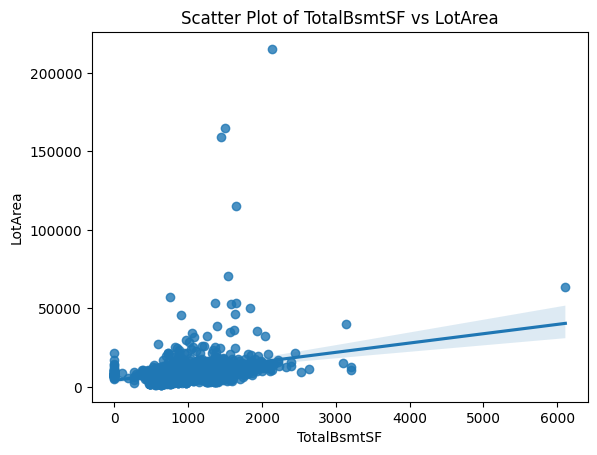

R-squared: 0.06803392407665221


In [6]:
# Create a scatter plot with regression line
sns.regplot(x='TotalBsmtSF', y='LotArea', data=df)
plt.xlabel('TotalBsmtSF')
plt.ylabel('LotArea')
plt.title('Scatter Plot of TotalBsmtSF vs LotArea')
plt.show()

# Fit a linear regression model
model = ols('LotArea ~ TotalBsmtSF', data=df).fit()

# Print the R-squared value
print(f"R-squared: {model.rsquared}")

 In this case, the R-squared value indicates that about 06% of the variability in LotArea can be explained by TotalBsmtSF. This is a considerably low value and therefore it implies that TotalBsmtSF is not a good predictor for LotArea.



---


3. Calculate Correlation for questions (1) and (2) and explain the correlation value to
support your answer for questions (1) and (2)

In [7]:
correlation_1 = df['GrLivArea'].corr(df['SalePrice'])
print(f"Correlation between GrLivArea and SalePrice: {correlation_1}")

correlation_2 = df['TotalBsmtSF'].corr(df['LotArea'])
print(f"Correlation between TotalBsmtSF and LotArea: {correlation_2}")

Correlation between GrLivArea and SalePrice: 0.7086244776126523
Correlation between TotalBsmtSF and LotArea: 0.26083313454515755


The strong positive correlation between GrLivArea and SalePrice indicates that larger houses tend to sell for higher prices. This aligns with the first regression model's finding that GrLivArea is a significant predictor. Conversely, the very weak positive correlation between TotalBsmtSF and LotArea suggests that there's a minimal relationship between basement size and lot area, which is consistent with the second model's poor predictive power.



---

4. Create a regression model to predict SalePrice using all other inputs. Discuss the
effectiveness of the model using R-squared value. Report 3 most significant inputs
and 3 least significant inputs (based on p-value) and interpret the results. Create one
new input of your choice of values and show the prediction of SalePrice using the
same model.

In [63]:
X = df.drop(['SalePrice'], axis=1)
Y = df['SalePrice']

numeric_features = X.select_dtypes(include=['number'])
categorical_features = X.select_dtypes(exclude=['number'])

if not categorical_features.empty:
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    encoded_data = encoder.fit_transform(categorical_features)
    encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_features.columns))

    X = pd.concat([numeric_features, encoded_df], axis=1)

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

print(f"R-squared: {model.rsquared}")

p_values = model.pvalues

top_3_inputs = p_values.sort_values().head(3).index.tolist()
bottom_3_inputs = p_values.sort_values().tail(3).index.tolist()

print(f"3 Most Significant Inputs: {top_3_inputs}")
print(f"3 Least Significant Inputs: {bottom_3_inputs}")

R-squared: 0.8034529153616841
3 Most Significant Inputs: ['OverallQual', 'GarageCars', 'SaleCondition_Abnorml']
3 Least Significant Inputs: ['Id', 'FullBath', 'HalfBath']


The R-Squared value in this case is very high and it indicates that about 80% of the variability in SalePrice can be explained by the other inputs. A higher R-squared value generally indicates a better fit of the model to the data.

The significance of inputs also makes sence, since the salesprice intuitively should have a high correlation with OverallQuality, GarageCars and SaleCondition_Abnormal features of a House.



In [64]:
df_encoded = pd.get_dummies(df, drop_first=True)

df_encoded = df_encoded.apply(pd.to_numeric, errors='coerce')

df_encoded = df_encoded.dropna()

# new feature 'QualityPriceRatio'
df_encoded['QualityPriceRatio'] = df_encoded['OverallQual'] / df_encoded['GrLivArea']

X = df_encoded.drop('SalePrice', axis=1)
y = df_encoded['SalePrice']

X_const = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X_const, y, test_size=0.2, random_state=42)

print("X_train types:\n", X_train.dtypes)
print("y_train type:\n", y_train.dtypes)

X_train = X_train.astype(float)
y_train = y_train.astype(float)

ols_model = sm.OLS(y_train, X_train).fit()

print(ols_model.summary())

y_pred = ols_model.predict(X_test)

print("\nPredicted SalePrice for the test set:")
print(y_pred.head())

r_squared = ols_model.rsquared
print(f'\nR-squared value after adding QualityPriceRatio: {r_squared}')

X_train types:
 const                    float64
Id                         int64
LotArea                    int64
OverallQual                int64
OverallCond                int64
YearBuilt                  int64
TotalBsmtSF                int64
1stFlrSF                   int64
2ndFlrSF                   int64
GrLivArea                  int64
BsmtFullBath               int64
BsmtHalfBath               int64
FullBath                   int64
HalfBath                   int64
BedroomAbvGr               int64
KitchenAbvGr               int64
Fireplaces                 int64
GarageCars                 int64
PavedDrive_P                bool
PavedDrive_Y                bool
SaleCondition_AdjLand       bool
SaleCondition_Alloca        bool
SaleCondition_Family        bool
SaleCondition_Normal        bool
SaleCondition_Partial       bool
QualityPriceRatio        float64
dtype: object
y_train type:
 int64
                            OLS Regression Results                            
Dep. Variabl



---

5. Create a regression model to predict LotArea using all other inputs. Discuss the
effectiveness of the model using R-squared value. Report 3 most significant inputs
and 3 least significant inputs (based on p-value) and interpret the results. Create one
new input of your choice of values and show the prediction of LotArea using the
same model

In [32]:
X = df.drop(['LotArea'], axis=1)
Y = df['LotArea']

numeric_features = X.select_dtypes(include=['number'])
categorical_features = X.select_dtypes(exclude=['number'])

if not categorical_features.empty:
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    encoded_data = encoder.fit_transform(categorical_features)
    encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_features.columns))

    X = pd.concat([numeric_features, encoded_df], axis=1)

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

print(f"R-squared: {model.rsquared}")

p_values = model.pvalues

top_3_inputs = p_values.sort_values().head(3).index.tolist()
bottom_3_inputs = p_values.sort_values().tail(3).index.tolist()

print(f"3 Most Significant Inputs: {top_3_inputs}")
print(f"3 Least Significant Inputs: {bottom_3_inputs}")

R-squared: 0.17381807921445902
3 Most Significant Inputs: ['OverallQual', 'Fireplaces', 'SalePrice']
3 Least Significant Inputs: ['FullBath', 'GrLivArea', 'OverallCond']


The R-Squared value is so low it indicates we can only explain about 17% of the variability in LotArea using other inputs.

The 3 most and least significant inputs also make sense since Lot area does not have a high correlation with FullBath, GrLivArea and OverallCond but it has high correlations with OverallQual, Fireplaces and SalePrice.

I intend to check the distribution of LotArea, this isn't required in the question.

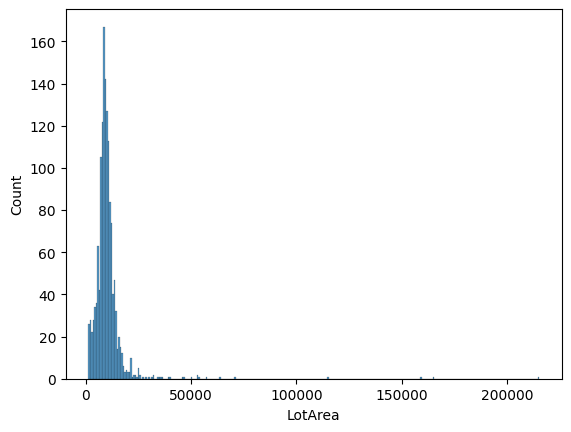

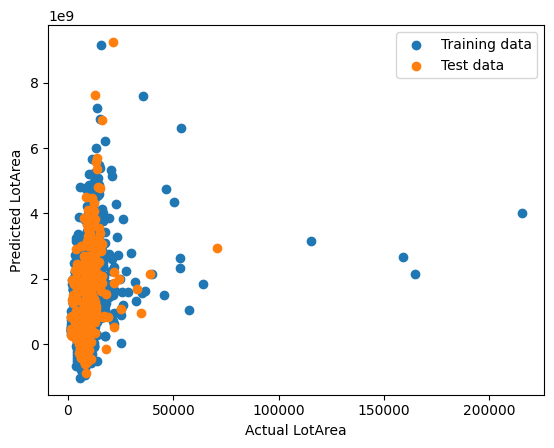

In [20]:
sns.histplot(df['LotArea'])
plt.show()

plt.scatter(y_train, ols_model.predict(X_train), label='Training data')
plt.scatter(y_test, ols_model.predict(X_test), label='Test data')
plt.xlabel('Actual LotArea')
plt.ylabel('Predicted LotArea')
plt.legend()
plt.show()

Create one
new input of your choice of values and show the prediction of LotArea using the
same model

In [67]:
X = df_encoded.drop('LotArea', axis=1)
y = df_encoded['LotArea']

X_const = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X_const, y, test_size=0.2, random_state=42)

X_train = X_train.astype(float)
y_train = y_train.astype(float)

lotarea_model = sm.OLS(y_train, X_train).fit()

new_house = pd.DataFrame({
    'Id': [1461],
    'OverallQual': [8],
    'OverallCond': [6],
    'YearBuilt': [2010],
    'TotalBsmtSF': [4000],
    '1stFlrSF': [4000],
    '2ndFlrSF': [4000],
    'GrLivArea': [2400],
    'BsmtFullBath': [1],
    'BsmtHalfBath': [0],
    'FullBath': [2],
    'HalfBath': [1],
    'BedroomAbvGr': [4],
    'KitchenAbvGr': [1],
    'Fireplaces': [1],
    'GarageCars': [2],
    'PavedDrive': [1],
    'SaleCondition': [1],
    'SalePrice': [750000]
})

categorical_features = new_house.select_dtypes(include=['object'])
if not categorical_features.empty:
    new_house_encoded = pd.get_dummies(categorical_features, drop_first=True)
    new_house = pd.concat([new_house.select_dtypes(include=['number']), new_house_encoded], axis=1)

missing_cols = set(X_train.columns) - set(new_house.columns)
for col in missing_cols:
    new_house[col] = 0

new_house = new_house[X_train.columns]

new_house_const = sm.add_constant(new_house)

predicted_lotarea = lotarea_model.predict(new_house_const)

print("New House Characteristics:")
print("-------------------------")
for col in new_house.columns:
    print(f"{col}: {new_house[col].iloc[0]}")

print("\nPredicted Lot Area:")
print(f"{predicted_lotarea[0]:.0f} square feet")

New House Characteristics:
-------------------------
const: 0
Id: 1461
OverallQual: 8
OverallCond: 6
YearBuilt: 2010
TotalBsmtSF: 4000
1stFlrSF: 4000
2ndFlrSF: 4000
GrLivArea: 2400
BsmtFullBath: 1
BsmtHalfBath: 0
FullBath: 2
HalfBath: 1
BedroomAbvGr: 4
KitchenAbvGr: 1
Fireplaces: 1
GarageCars: 2
SalePrice: 750000
PavedDrive_P: 0
PavedDrive_Y: 0
SaleCondition_AdjLand: 0
SaleCondition_Alloca: 0
SaleCondition_Family: 0
SaleCondition_Normal: 0
SaleCondition_Partial: 0
QualityPriceRatio: 0

Predicted Lot Area:
1099 square feet




---


6. From Question 4, drop/remove all the columns which are not signification (p-value gt 0.05) and create a new model to predict SalePrice. Discuss the performance of
the model using few inputs as compared to using all inputs in (Question 4). Which
model do you prefer and why?
a. The idea is to create a simple generalized model with fewer inputs which are
important for prediction and getting the similar performance. For this concept,
please research and study “Regularization in Regression”

In [68]:
X = df.drop(['SalePrice'], axis=1)
Y = df['SalePrice']

numeric_features = X.select_dtypes(include=['number'])
categorical_features = X.select_dtypes(exclude=['number'])

if not categorical_features.empty:
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    encoded_data = encoder.fit_transform(categorical_features)
    encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_features.columns))

    X = pd.concat([numeric_features, encoded_df], axis=1)

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

print(f"R-squared: {model.rsquared}")

p_values = model.pvalues

insignificant_features = p_values[p_values > 0.05].index.tolist()

X_refined = X.drop(columns=insignificant_features)

X_refined_const = sm.add_constant(X_refined)
refined_model = sm.OLS(Y, X_refined_const).fit()


print(f"Refined Model R-squared: {refined_model.rsquared}")
print(f"Refined Model Summary:\n{refined_model.summary()}")

predicted_saleprice = refined_model.predict(X_refined_const)

print(f"Predicted SalePrices for the first 5 rows:")
print(predicted_saleprice[:5])


R-squared: 0.8034529153616841
Refined Model R-squared: 0.7528815409960129
Refined Model Summary:
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     258.4
Date:                Mon, 21 Oct 2024   Prob (F-statistic):               0.00
Time:                        18:42:44   Log-Likelihood:                -17524.
No. Observations:                1460   AIC:                         3.508e+04
Df Residuals:                    1442   BIC:                         3.518e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

We can compare the predicted and the actual SalePrice for the first few rows.

In [52]:
comparison_df = pd.DataFrame({
    'Actual SalePrice': Y.head(5),
    'Predicted SalePrice': predicted_saleprice[:5]
})
print(comparison_df)


   Actual SalePrice  Predicted SalePrice
0            208500        202369.112458
1            181500        201034.644577
2            223500        220307.901932
3            140000        213043.492905
4            250000        283733.470379


We can see that the refined model is performing substantially better than the unrefined model and our predictions are relatively much closer to actual SalePrice values. In the spirit of better prediction, I will use a model with fewer, more relevant and statistically significant inputs.




---

7. Using the model with 3 inputs in Question 6, create 2 new data records and predict their MonthlyIncome. Discuss if the predicted output makes sense based on your new data records.

In [60]:
top_3_inputs = ['OverallQual', 'GarageCars', 'SaleCondition_Abnorml']

X_top_3 = X[top_3_inputs]
X_top_3_const = sm.add_constant(X_top_3)

model_top_3 = sm.OLS(Y, X_top_3_const).fit()

print(f"Top 3 Model R-squared: {model_top_3.rsquared}")

new_data = pd.DataFrame({
    'OverallQual': [1, 2],
    'GrLivArea': [500, 800],
    'TotalBsmtSF': [700, 800],
})

new_data_const = sm.add_constant(new_data)

predicted_saleprice = model_top_3.predict(new_data_const)

print("Predicted Sale Prices for the new data records:")
print(predicted_saleprice)


Top 3 Model R-squared: 0.6689679535332734
Predicted Sale Prices for the new data records:
0    8.310694e+06
1    1.578116e+07
dtype: float64


The Sales Price is quite high for my inputs, and it isn't a reflection of the typical SalesPrice values in the dataset. This might be due to multilinearity, overfitting or other causes that we can explore.